In [4]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import math

Problem 1

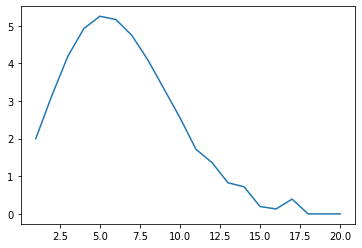

Highest dimension at 5 or 6


In [3]:
def openBallVolume(n, N = 10**4):
    points=np.random.uniform(-1,1,(n,N))
    lengths=la.norm(points, axis=0)
    num_within=np.count_nonzero(lengths<1)
    return 2**n*(num_within/N)

x=[i for i in range(1,21)]
y=[openBallVolume(i,1000000) for i in x]
plt.plot(x,y)
plt.show()
print('Highest dimension at 5 or 6')

Problem 2

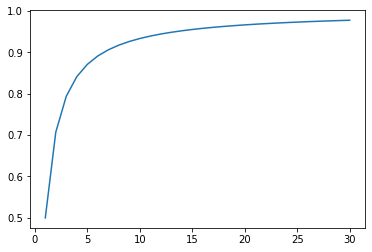

In [6]:
x=[i for i in range(1,31)]
y=[2**(-1/i) for i in x]

plt.plot(x,y)
plt.show()

Problem 3

In [41]:
def generate(n,d):
    list_of_points=[]
    for i in range(n):
        point=[]
        for j in range(d):
            point.append(np.random.uniform(-1,1))
        norm = np.sqrt(np.sum([s**2 for s in point]))
        norm_point=point/norm
        list_of_points.append(tuple(norm_point))
    return list_of_points

points=generate(500,50)
new_points=generate(5,50)

def in_band(p,x):
    if np.dot(p,x)<2/np.sqrt(50):
        return True
    else:
        return False

for p in range(len(new_points)):
    count=0
    for x in points:
        if in_band(new_points[p],x):
            count+=1
    print("p"+str(p+1)+": "+str(count))
    
count=0
for x in points:
    in_all=True
    for p in new_points:
        if not in_band(p,x):
            in_all=False
    if in_all:
        count+=1
print("In all: "+str(count))

p1: 490
p2: 487
p3: 488
p4: 488
p5: 487
In all: 442


Problem 4

58


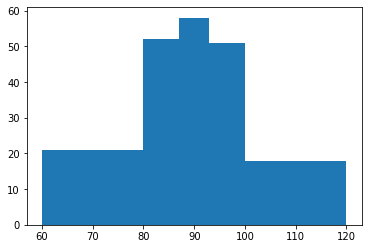

In [66]:
def generate_gaussian(n,d):
    list_of_points=[]
    for i in range(n):
        point=[]
        for j in range(d):
            point.append(np.random.normal(0,1))
        list_of_points.append(tuple(point))
    return list_of_points

points=generate_gaussian(200,50)
point=generate_gaussian(1,50)

def orthogonality(p,x):
    return np.arccos(np.dot(p,x)/(np.linalg.norm(p)*np.linalg.norm(x)))*(180/np.pi)

count=0
for x in points:
    if abs(90-orthogonality(point,x))<=3:
        count+=1

print(count)
plt.hist(np.array([orthogonality(point,x) for x in points]),[60,80,87,93,100,120]);